# **💻 Author Information**

**Name:** CHUA JINGXUAN (Kanon)

**Email:** geochua144@gmail.com


**Note:** This Jupyter Notebook was created by CHUA JINGXUAN. If you find any issues, have questions, or want to provide feedback, please don't hesitate to reach out. Thank you for exploring this notebook!

**Date Written**: 07/03/2025 (FRI)

**Last Updated**: 07/03/2025 (FRI)

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/Kanon14) <a href="https://www.linkedin.com/in/chua-jingxuan-51a300173" target="_blank" style="margin-left: 10px;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/1/19/LinkedIn_logo.svg" alt="LinkedIn Icon" width="80" height="22">
</a>

---

# 🔬 **Experiment for Tennis Ball Detection: YOLO12 Large**

# ⚙️ **1.0 Environment Setup**

## 1.1 Connecting to GPU for Training Acceleration
Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Fri Mar  7 14:06:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   43C    P8             12W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 1.2 Installing Ultralytics

In [2]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 39.3/235.7 GB disk)


## 1.3 Import Essential Libraries

In [3]:
import requests
import zipfile
import os
import glob
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image as IPyImage, display

# ⬇️ **2.0 Download Tennis Ball Image Dataset**

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [4]:
HOME = os.getcwd()
print(HOME)

/content


**NOTE:** When training YOLOv12, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/viren-dhanwani/tennis-ball-detection) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [6]:
from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("viren-dhanwani").project("tennis-ball-detection")
version = project.version(6)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to tennis-ball-detection-6 in yolov12:: 100%|██████████| 1168/1168 [00:00<00:00, 5583.12it/s]


In [12]:
# Show the location of the dataset
dataset.location

'/content/datasets/tennis-ball-detection-6'

In [13]:
# Display the contents of the YAML file that contains the configuration or dataset information
%cat {dataset.location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['tennis ball']

roboflow:
  workspace: viren-dhanwani
  project: tennis-ball-detection
  version: 6
  license: CC BY 4.0
  url: https://universe.roboflow.com/viren-dhanwani/tennis-ball-detection/dataset/6

# 🛠️ **3.0 Customize YOLO12l Model Training**

In [14]:
# Change the current working directory to the HOME directory
%cd {HOME}

# Train a YOLO12 model for object detection with the specified parameters
!yolo task=detect mode=train \
model=yolo12l.pt \
data={dataset.location}/data.yaml \
epochs=100 batch=16 lr0=0.001 imgsz=640 patience=10 save_period=10 \
project=tennis-ball-detection name=train \
plots=True \
exist_ok=True \
save=True

/content
100% 51.2M/51.2M [00:00<00:00, 128MB/s]
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=detect, mode=train, model=yolo12l.pt, data=/content/datasets/tennis-ball-detection-6/data.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=tennis-ball-detection, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sav

# 🔎 **4.0 Result Analysis**

**NOTE:** The results of the completed training are saved in `{HOME}/tennis-ball-detection/train`. Let's examine them.

In [15]:
!ls {HOME}/tennis-ball-detection/train

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1741357191.580d6342e171.5235.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


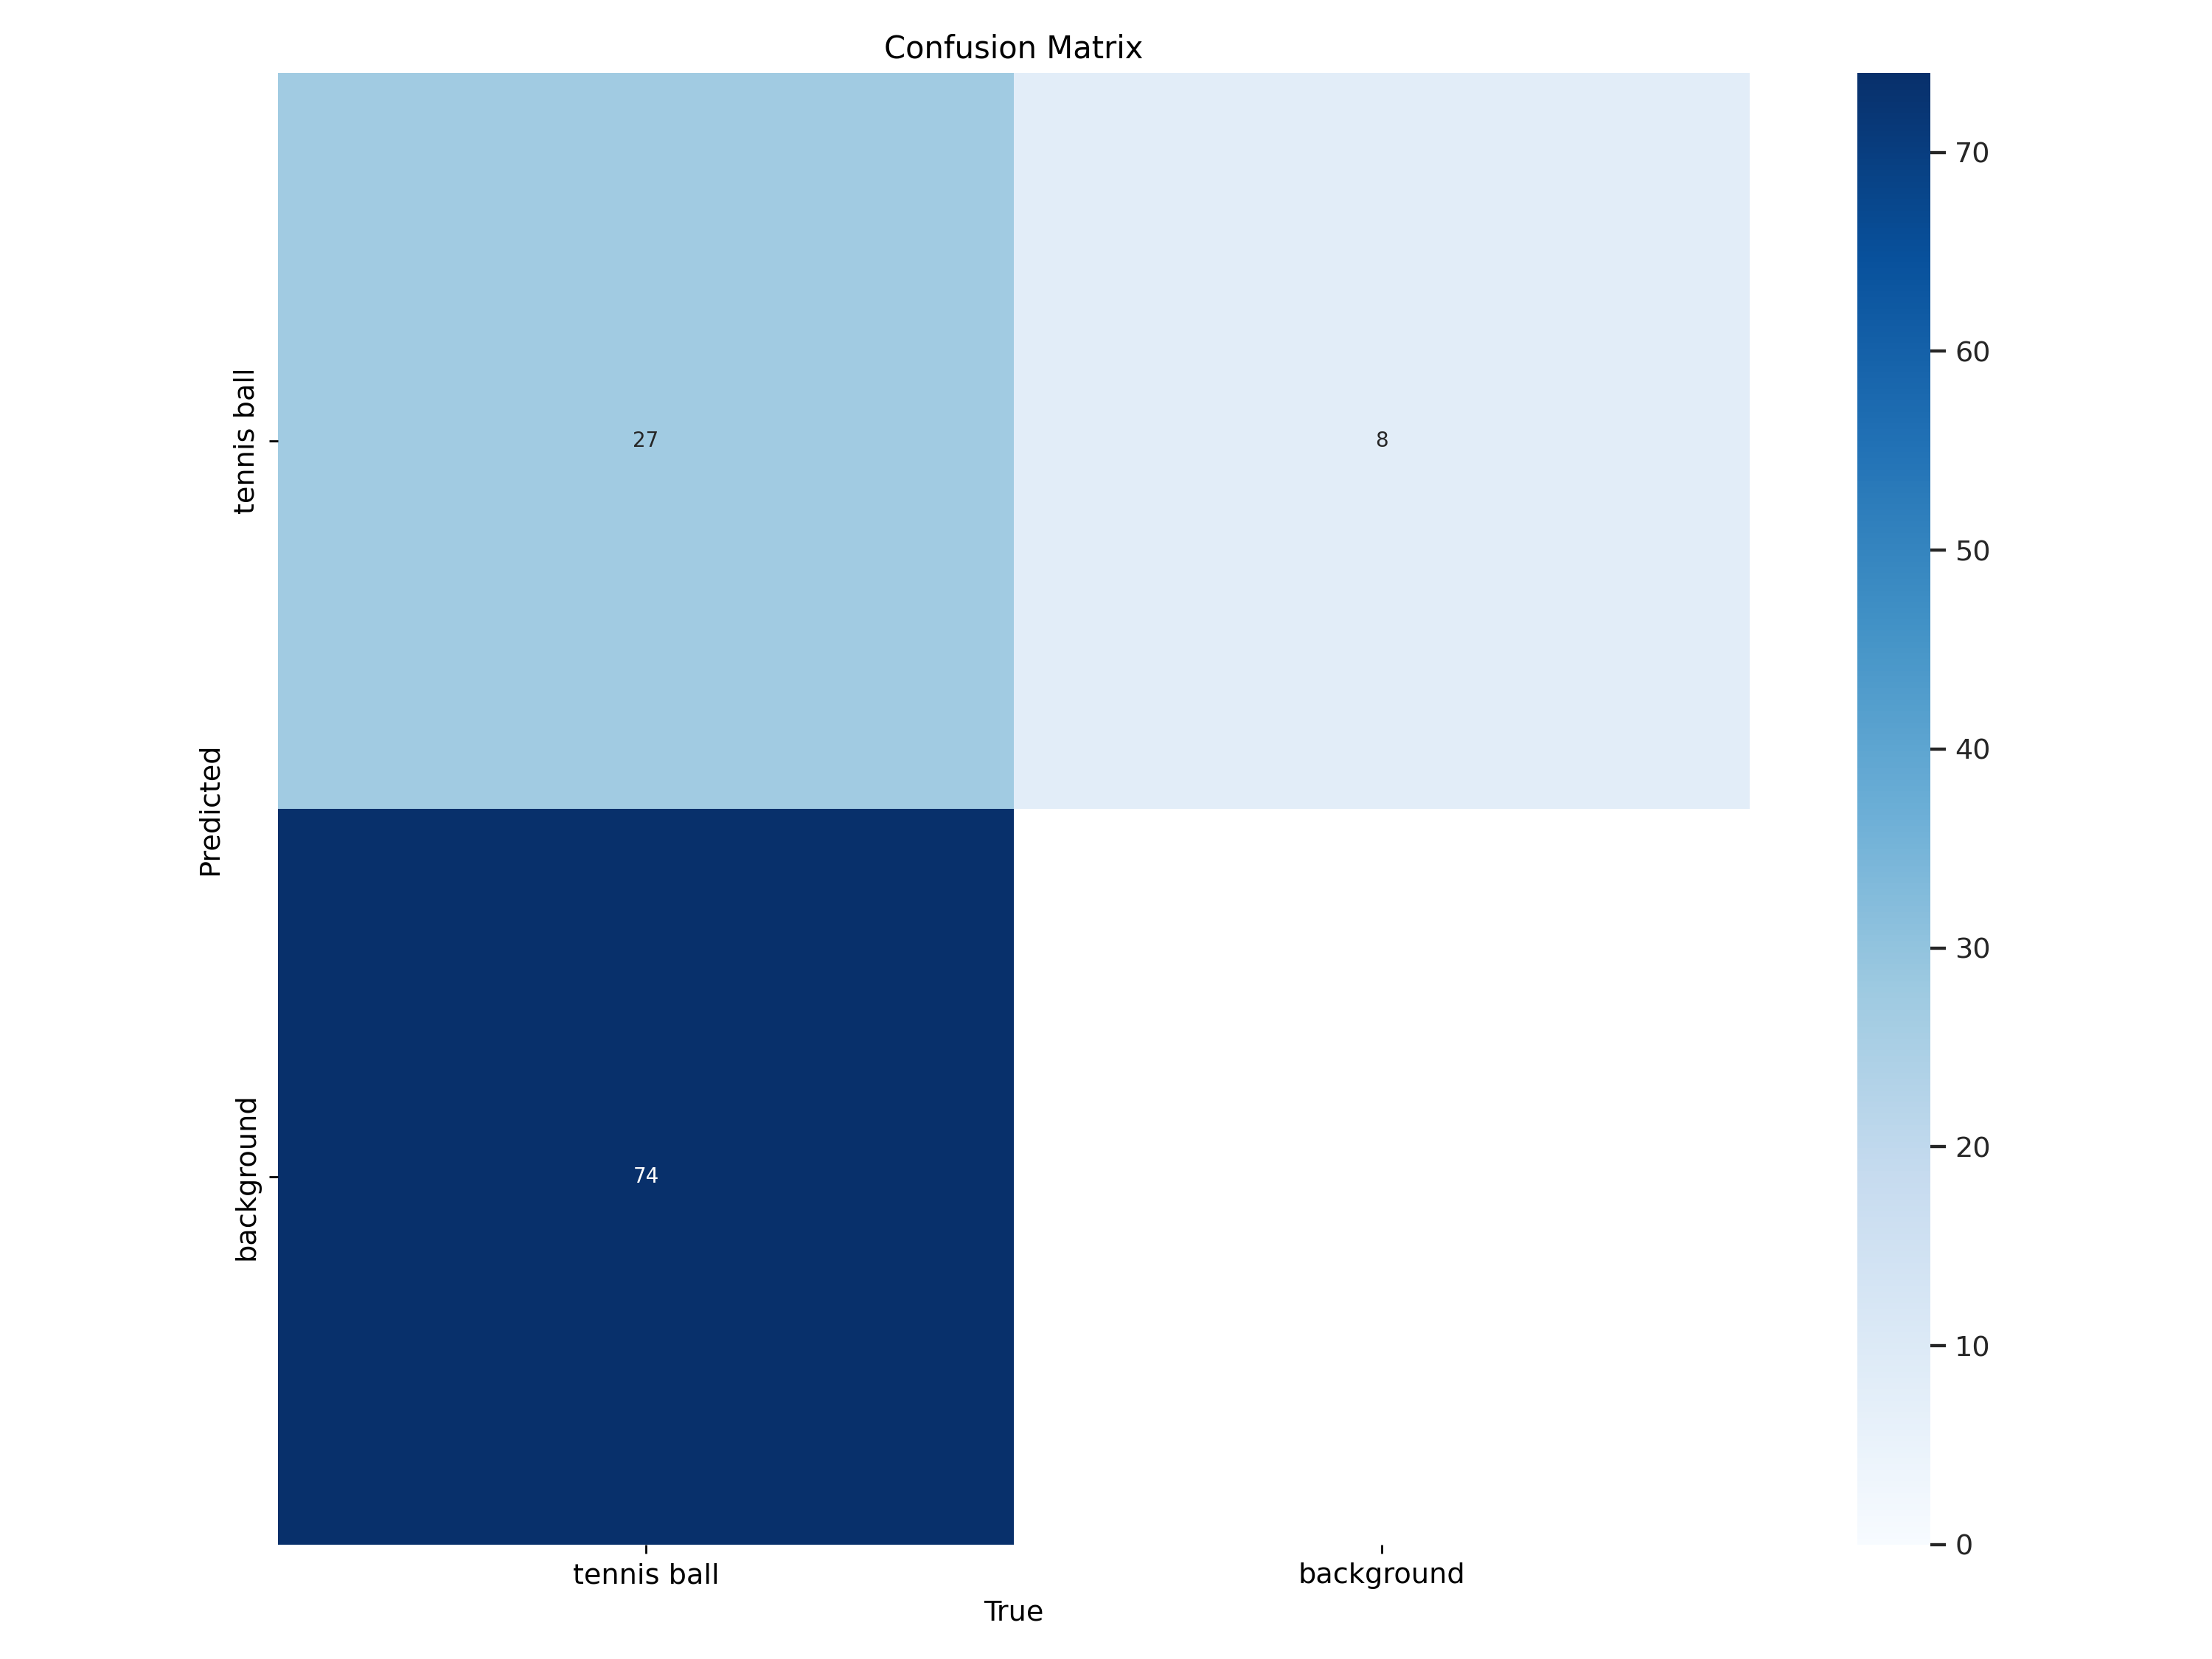

In [16]:
# Display the confusion matrix image generated during the training process
IPyImage(filename=f'{HOME}/tennis-ball-detection/train/confusion_matrix.png', width=600)

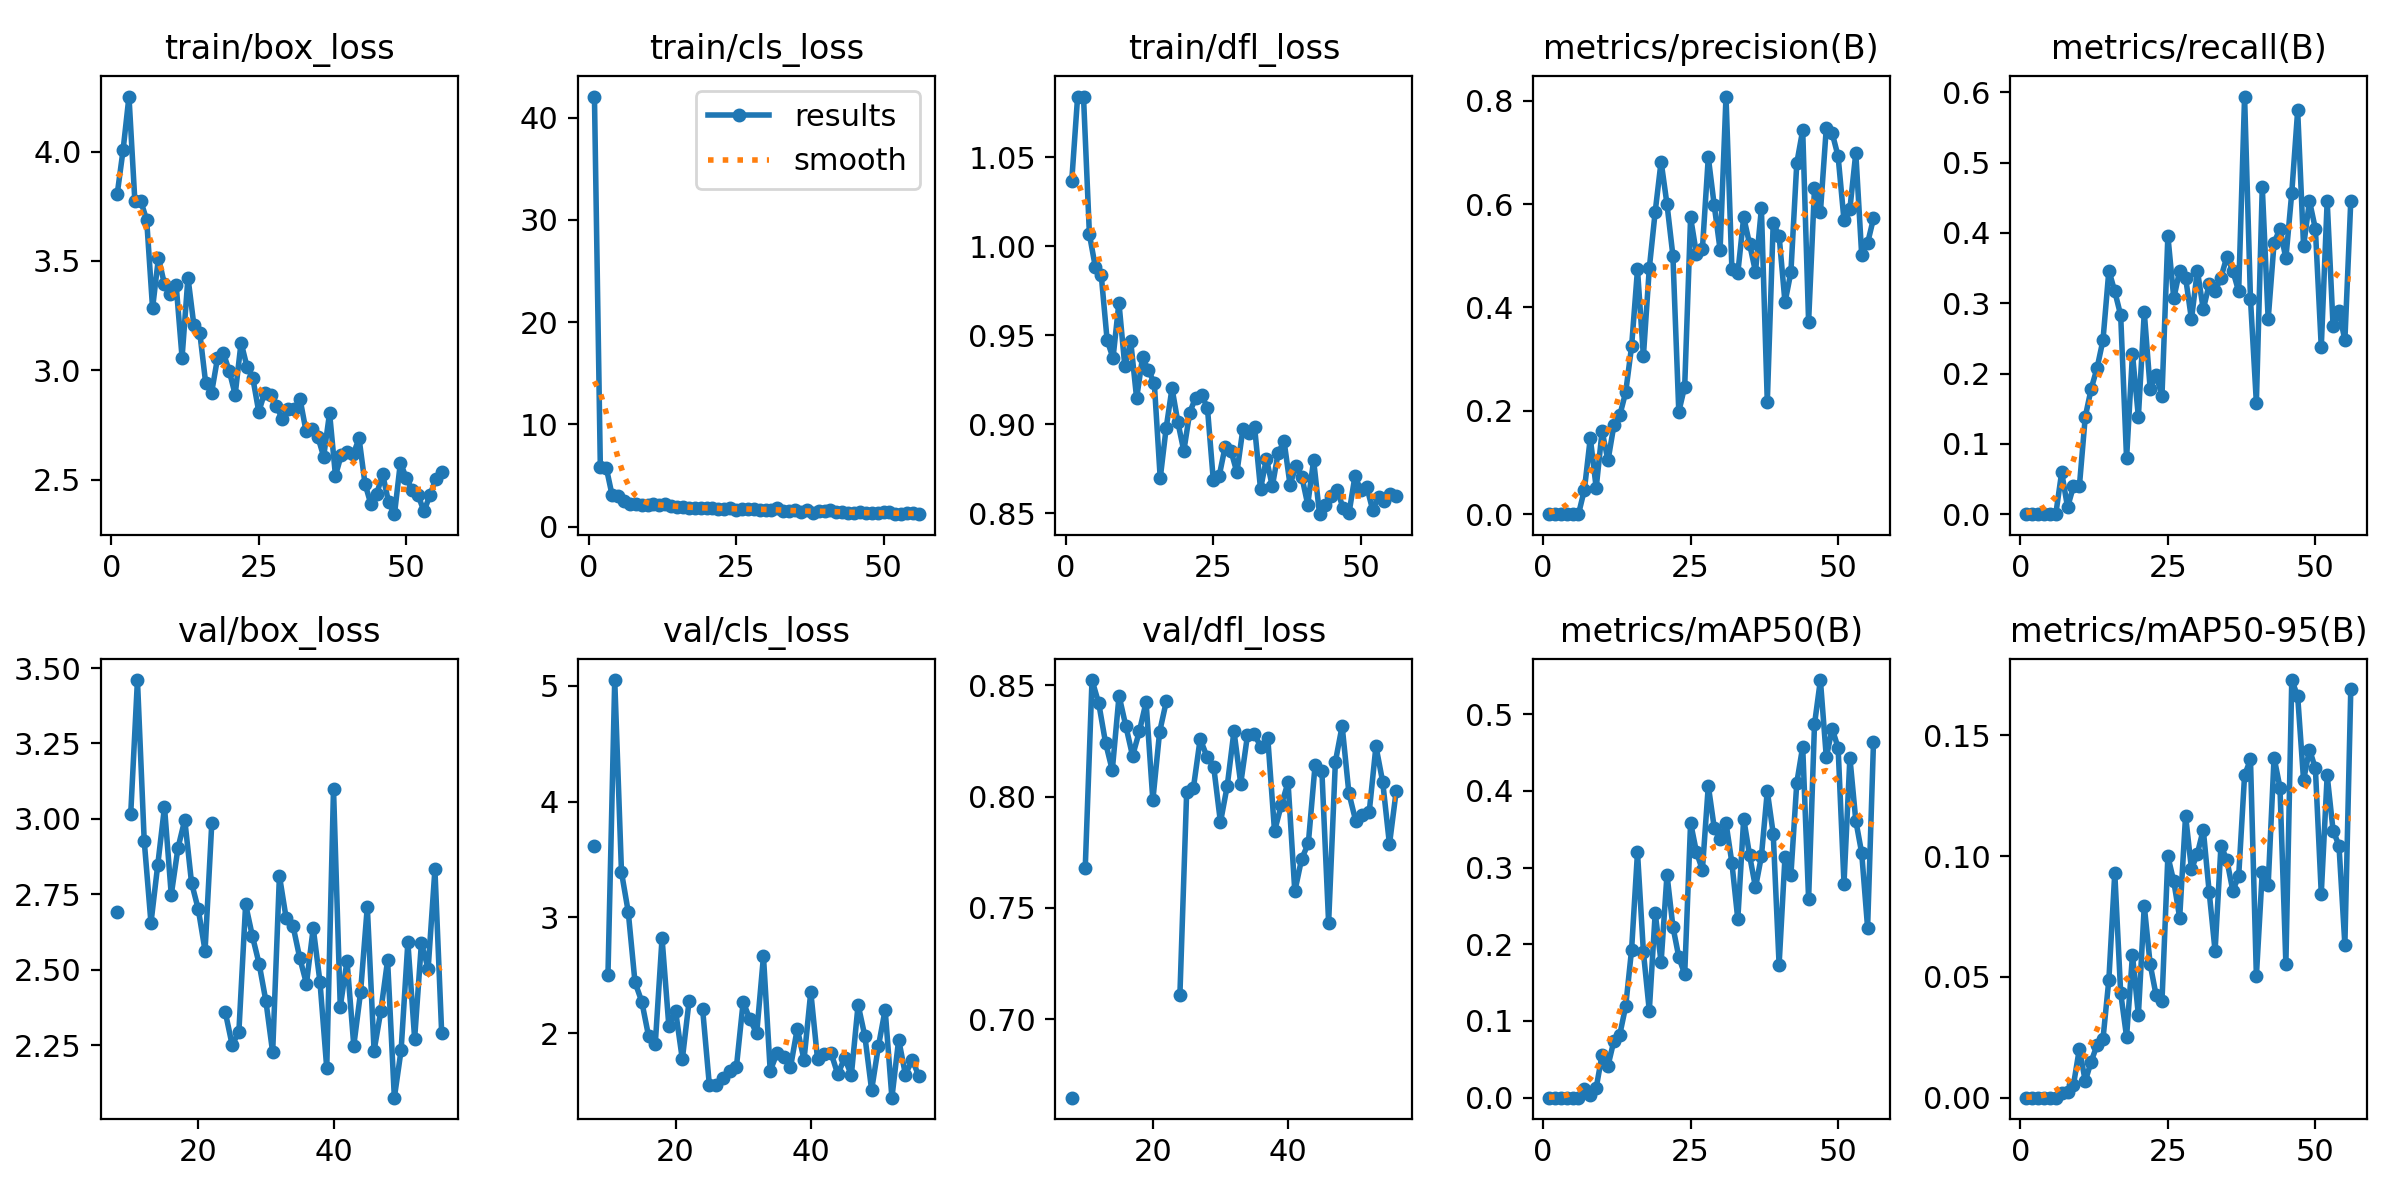

In [17]:
# Display the training results graph, which includes metrics such as loss, precision, recall, and mAP
IPyImage(filename=f'{HOME}/tennis-ball-detection/train/results.png', width=600)

# 📊 **5.0 Validate Fine-Tuned Model**

In [21]:
# Use the trained YOLOv8 model to make predictions on test images
!yolo task=detect mode=predict \
model={HOME}/tennis-ball-detection/train/weights/best.pt \
conf=0.25 \
source={dataset.location}/test/images \
project=tennis-ball-detection \
name=predict \
exist_ok=True \
save=True

Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv12l summary (fused): 283 layers, 26,339,843 parameters, 0 gradients, 88.5 GFLOPs

image 1/50 /content/datasets/tennis-ball-detection-6/test/images/synframe101_jpg.rf.1f308718bf44dcb6dd10e32ce9fc6cd5.jpg: 384x640 (no detections), 92.8ms
image 2/50 /content/datasets/tennis-ball-detection-6/test/images/synframe119_jpg.rf.86ddef4b7c7c996344879b9f79c46ddf.jpg: 384x640 (no detections), 27.8ms
image 3/50 /content/datasets/tennis-ball-detection-6/test/images/synframe122_jpg.rf.9f84517312ec31ca29cfd1b828dfe647.jpg: 384x640 1 tennis ball, 27.4ms
image 4/50 /content/datasets/tennis-ball-detection-6/test/images/synframe1247_jpg.rf.f1141dda575c60eeb4b7a29a583c1afa.jpg: 384x640 (no detections), 28.7ms
image 5/50 /content/datasets/tennis-ball-detection-6/test/images/synframe136_jpg.rf.750bbb8f3e5d2922a3b9c2758a1b4ac2.jpg: 384x640 (no detections), 32.2ms
image 6/50 /content/datasets/tennis-ball-detection-6/test/ima

In [22]:
# Plot and visualize images in a 1x1 or 2x2 grid, based on the number of images available
def visualize(result_dir):
    """
    This function accepts a directory path containing images and visualizes them
    - If there are fewer than 4 images, it plots them in a 1x1 grid.
    - If there are 4 or more images, it plots them in a 2x2 grid.
    """

    image_names = glob.glob(os.path.join(result_dir, '*.jpg')) # Get all JPG image file paths from the directory
    if len(image_names) < 4:
        plt.figure(figsize=(10, 7)) # Create a figure for fewer than 4 images
        for i, image_name in enumerate(image_names):
            image = plt.imread(image_name)
            plt.subplot(1, 1, i+1) # Create a 1x1 subplot for each image
            plt.imshow(image)
            plt.axis('off')
            break
    if len(image_names) >= 4:
        plt.figure(figsize=(15, 12)) # Create a figure for 4 or more images
        for i, image_name in enumerate(image_names):
            image = plt.imread(image_name)
            plt.subplot(2, 2, i+1) # Create a 2x2 subplot for the first 4 images
            plt.imshow(image)
            plt.axis('off')
            if i == 3: # Stop after plotting 4 images
                break

    plt.title('Inference Results', fontsize=20) # Set the title of the plot
    plt.tight_layout() # Adjust the layout for better spacing
    plt.show() # Display the plot

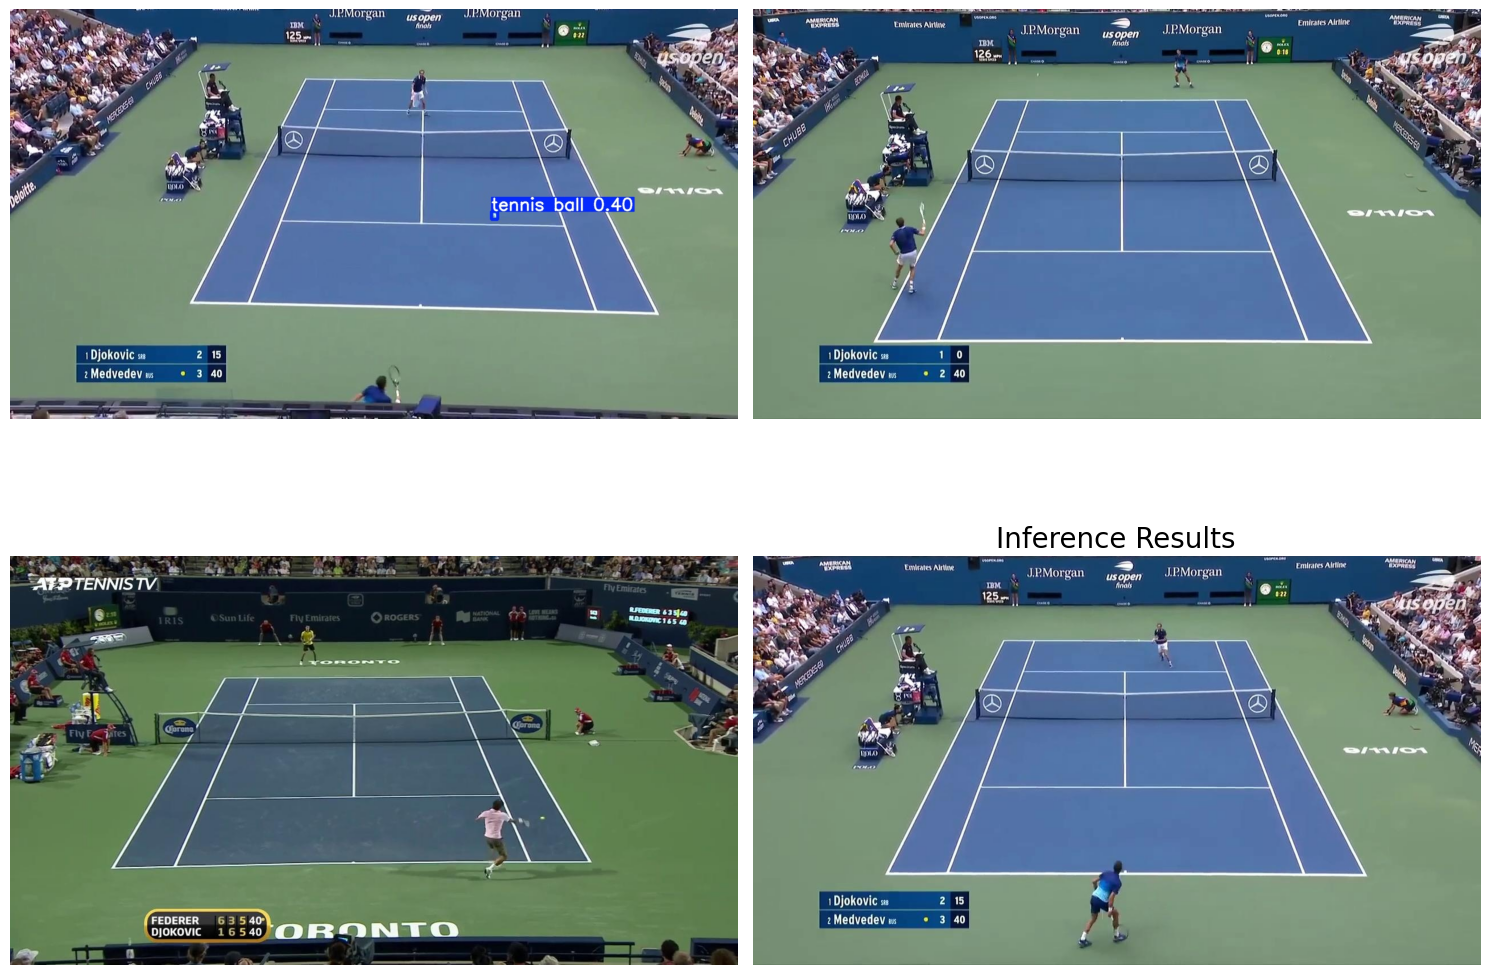

In [24]:
# Call the visualize function to display prediction results
visualize('/content/tennis-ball-detection/predict')

# **📂 Compress and Download Folder**
This section zips the `tennis-ball-detection` folder and provides a downloadable file for local storage or further use. The steps include:

* Compressing the folder into a `.zip` archive.
* Automatically initiating the download of the zipped file.

In [25]:
import shutil
from google.colab import files

# Define the folder name and output ZIP file name
folder_name = "tennis-ball-detection"
zip_file_name = f"{folder_name}.zip"

# Zip the folder
shutil.make_archive(folder_name, 'zip', folder_name)

# Download the zipped folder
files.download(zip_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 🌟 **End of Training**